In [7]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

import csv

%matplotlib inline

In [8]:
file_path = "/home/jlab/g-2/daq/"
file_name_vec = ["frontend_output_calo02_18388.txt",
'frontend_output_calo02_18389.txt',
'frontend_output_calo02_18392.txt',
'frontend_output_calo03_18388.txt',
'frontend_output_calo03_18389.txt',
'frontend_output_calo03_18392.txt',
'frontend_output_calo04_18388.txt',
'frontend_output_calo04_18389.txt',
'frontend_output_calo04_18392.txt',
'frontend_output_calo08_18388.txt',
'frontend_output_calo08_18389.txt',
'frontend_output_calo08_18392.txt',
'frontend_output_calo09_18388.txt',
'frontend_output_calo09_18389.txt',
'frontend_output_calo09_18392.txt',
'frontend_output_calo10_18388.txt',
'frontend_output_calo10_18389.txt',
'frontend_output_calo10_18392.txt',
'frontend_output_calo11_18388.txt',
'frontend_output_calo11_18389.txt',
'frontend_output_calo11_18392.txt',
'frontend_output_calo12_18388.txt',
'frontend_output_calo12_18389.txt',
'frontend_output_calo12_18391.txt',
'frontend_output_calo12_18392.txt',
'frontend_output_calo13_18388.txt',
'frontend_output_calo13_18389.txt',
'frontend_output_calo13_18392.txt',
'frontend_output_calo14_18388.txt',
'frontend_output_calo14_18389.txt',
'frontend_output_calo14_18392.txt' ]

In [9]:
files_18392 = []
for file in file_name_vec:
    if '18392' in file:
        file = file_path+"processed_"+file
        files_18392.append(file)

In [10]:
caloVec = []
for i, file in enumerate(files_18392):
    if i < 0.1:
        df = pandas.read_csv(file, header=None,delimiter=' ')
        df[9]=pandas.Series(int(file[49:51]), index=df.index)
        #print(df.head())
    else:
        dfi = pandas.read_csv(file, header=None,delimiter=' ')
        dfi[9]=pandas.Series(int(file[49:51]), index=df.index)
        #print(dfi.head())
        df = pandas.concat([df,dfi],ignore_index=True)
    caloVec.append(int(file[49:51]))

In [11]:
print("Calorimeters in this set:" , caloVec)
df.describe()

Calorimeters in this set: [2, 3, 4, 8, 9, 10, 11, 12, 13, 14]


,0,7,9
count,0.0,251600.000000,251600.000000
mean,NaN,9.862555,8.600000
std,NaN,0.366613,4.054635
min,NaN,9.668896,2.000000
25%,NaN,9.820928,4.000000
50%,NaN,9.853376,9.500000
75%,NaN,9.888544,12.000000
max,NaN,57.843777,14.000000


Mean for calo 2 :  9.885199343720224 +/- 0.04380598538647379
Mean for calo 3 :  9.878295790302056 +/- 0.812503440292588
Mean for calo 4 :  9.839152546979431 +/- 0.7707765474088262
Mean for calo 8 :  9.84138905818764 +/- 0.053344786703895065
Mean for calo 9 :  9.852647838433963 +/- 0.07224884215395808
Mean for calo 10 :  9.878216258187592 +/- 0.1307590228316248
Mean for calo 11 :  9.854313045468984 +/- 0.04880054241806281
Mean for calo 12 :  9.85615472941176 +/- 0.07035431947400773
Mean for calo 13 :  9.884032480802825 +/- 0.0887729081082365
Mean for calo 14 :  9.856145035294167 +/- 0.21160924615056256


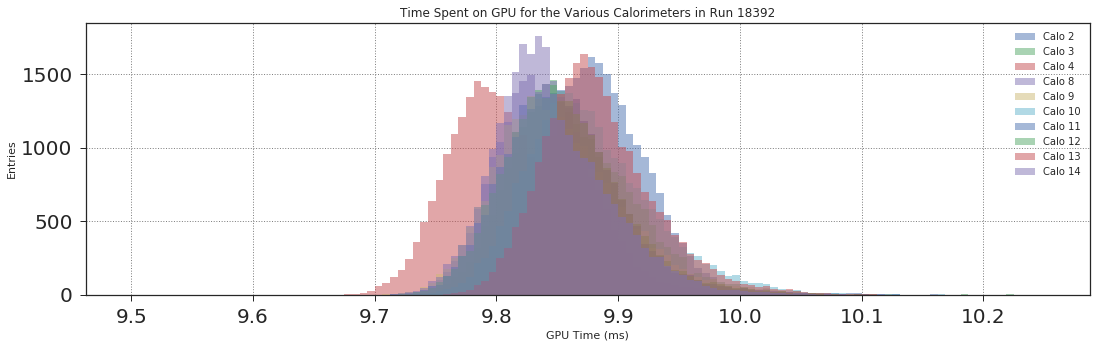

In [12]:
fig, ax = plt.subplots(figsize=(18, 5))
for calo in caloVec:
    dfi = df.loc[df[9]==calo]
    plt.hist(dfi[7],label="Calo "+str(calo),range=(9.5,10.25),bins=120,alpha=0.5)
    print("Mean for calo", calo,": ", np.mean(dfi[7]), "+/-", np.std(dfi[7]))
    
plt.xlabel("GPU Time (ms)")
plt.ylabel("Entries")
plt.title("Time Spent on GPU for the Various Calorimeters in Run 18392")
ax.grid(color='grey', linestyle=':', linewidth=1)

plt.legend()
plt.show()

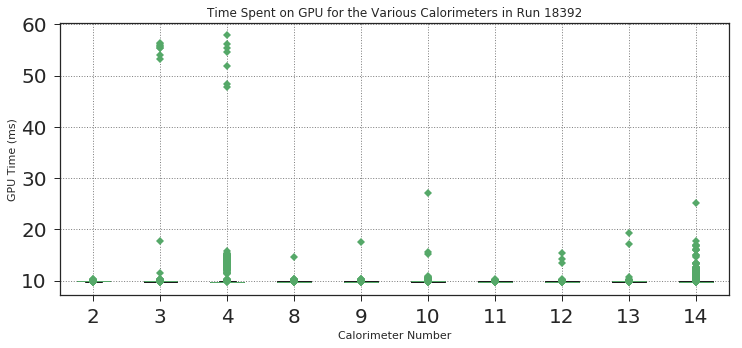

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
boxplotvec = []
for calo in caloVec:
    dfi = df.loc[df[9]==calo]
    boxplotvec.append(list(dfi[7]))
    
ding = plt.boxplot(boxplotvec,0, 'gD')
ax.set_xticklabels(caloVec)
    
    
plt.xlabel("Calorimeter Number")
plt.ylabel("GPU Time (ms)")
plt.title("Time Spent on GPU for the Various Calorimeters in Run 18392")
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.show()

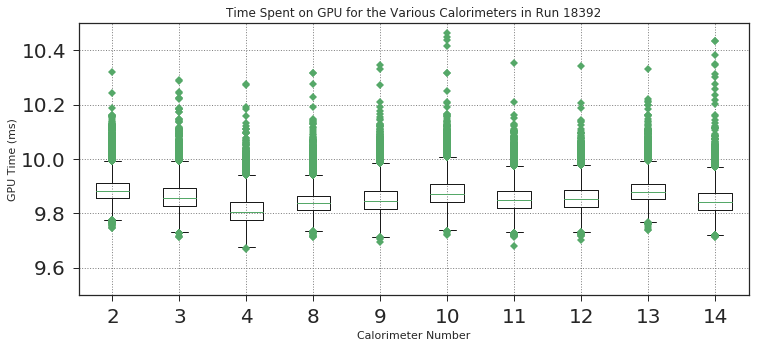

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
boxplotvec = []
for calo in caloVec:
    dfi = df.loc[df[9]==calo]
    boxplotvec.append(list(dfi[7]))
    
ding = plt.boxplot(boxplotvec, 0, 'gD')
ax.set_xticklabels(caloVec)
    
    
plt.xlabel("Calorimeter Number")
plt.ylabel("GPU Time (ms)")
plt.title("Time Spent on GPU for the Various Calorimeters in Run 18392")
plt.ylim(9.5,10.5)
ax.grid(color='grey', linestyle=':', linewidth=1)
plt.show()

In [15]:
df_outliers = df.loc[df[7]>10.3]
df_superoutliers = df.loc[df[7]>40]

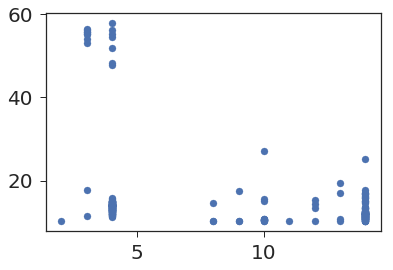

In [16]:
plt.scatter(df_outliers[9],df_outliers[7])
plt.show()

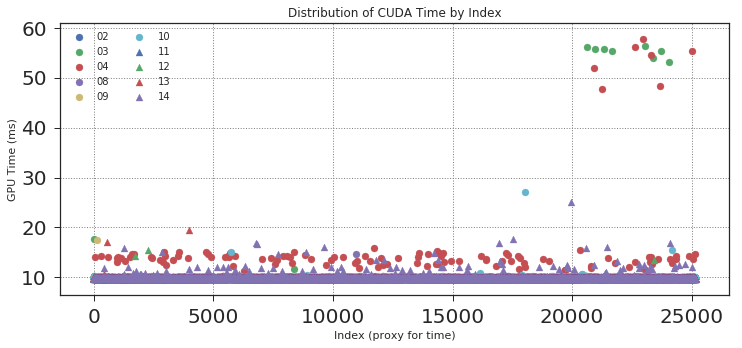

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
for i, file in enumerate(files_18392):
    dfi = pandas.read_csv(file, header=None,delimiter=' ')
    dfi[9]=pandas.Series(int(file[49:51]), index=df.index)
    #print(dfi.head())
    
    if i > 5:
        markerstring = '^'
    else:
        markerstring = 'o'
    plt.scatter(dfi.index,dfi[7],label=str(file[49:51]),marker=markerstring)
        
plt.legend(ncol=2)
plt.xlabel("Index (proxy for time)")
plt.ylabel("GPU Time (ms)")
plt.title("Distribution of CUDA Time by Index")
ax.grid(color='grey', linestyle=':', linewidth=1)

plt.show()

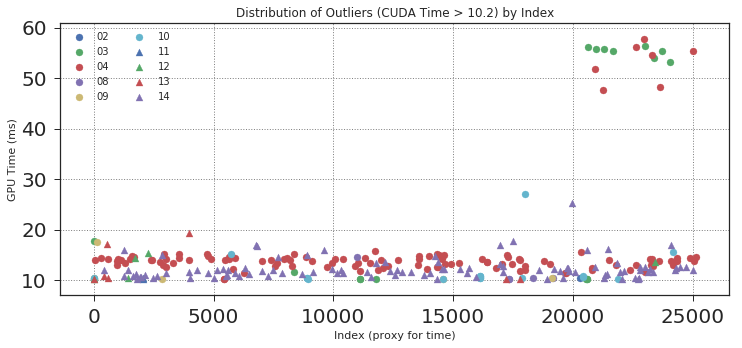

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
for i, file in enumerate(files_18392):
    dfi = pandas.read_csv(file, header=None,delimiter=' ')
    dfi[9]=pandas.Series(int(file[49:51]), index=df.index)
    #print(dfi.head())
    dfi = dfi.loc[dfi[7]>10.2]
    
    if i > 5:
        markerstring = '^'
    else:
        markerstring = 'o'
#    if( int(file[49:51]) < 5 and int(file[49:51]) > 2):
    plt.scatter(dfi.index,dfi[7],label=str(file[49:51]),marker=markerstring)
        
plt.legend(ncol=2)
plt.xlabel("Index (proxy for time)")
plt.ylabel("GPU Time (ms)")
plt.title("Distribution of Outliers (CUDA Time > 10.2) by Index")
ax.grid(color='grey', linestyle=':', linewidth=1)

plt.show()

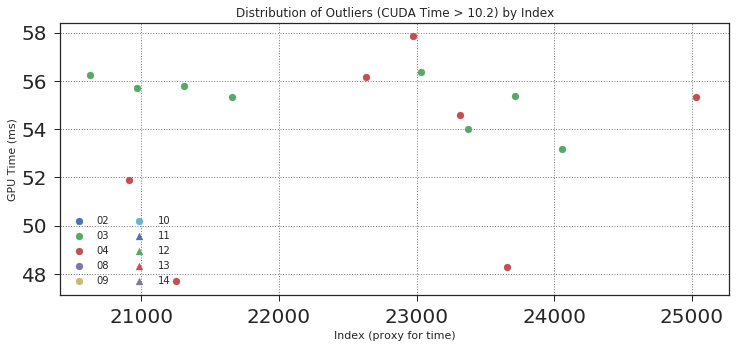

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
for i, file in enumerate(files_18392):
    dfi = pandas.read_csv(file, header=None,delimiter=' ')
    dfi[9]=pandas.Series(int(file[49:51]), index=df.index)
    #print(dfi.head())
    dfi = dfi.loc[dfi[7]>10.2]
    
    if i > 5:
        markerstring = '^'
    else:
        markerstring = 'o'
    plt.scatter((dfi.loc[dfi[7]>40]).index,(dfi.loc[dfi[7]>40])[7],label=str(file[49:51]),marker=markerstring)
        
plt.legend(ncol=2)
plt.xlabel("Index (proxy for time)")
plt.ylabel("GPU Time (ms)")
plt.title("Distribution of Outliers (CUDA Time > 10.2) by Index")
ax.grid(color='grey', linestyle=':', linewidth=1)

plt.show()

In [19]:
df_superoutliers.describe()

,0,7,9
count,0.0,15.000000,15.000000
mean,NaN,54.251053,3.466667
std,NaN,2.910830,0.516398
min,NaN,47.690655,3.000000
25%,NaN,53.576992,3.000000
50%,NaN,55.344608,3.000000
75%,NaN,55.972719,4.000000
max,NaN,57.843777,4.000000
